<a href="https://colab.research.google.com/github/marcos-mansur/my-study-notes/blob/main/WebScrapping_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing packages

In [ ]:
#selenium usefull stuff
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

#get html without opening a webdrive
import requests 

#html parser
import bs4

#only open a webbrowser
import webbrowser

#might be usefull
import pandas as pd
import sys, os, time 

#Open Webbrowser

how to open a webbrowser through python

In [ ]:
#can only open a webbrowser
import webbrowser
webbrowser.open('https://inventwithpython.com/')

#Command Line and pyperclip()

using arguments from Command Line and clipboard

In [ ]:
#! python3
# mapIt.py - Launches a map in the browser using an address from the
# command line or clipboard.

import webbrowser, sys, pyperclip

#sys.argv are the arguments in command line
if len(sys.argv) > 1:
    # Get address from command line.
    address = ' '.join(sys.argv[1:])
else:
    # Get address from clipboard.
    address = pyperclip.paste()

webbrowser.open('https://www.google.com/maps/place/' + address)

#Requests

The requests module lets you easily download files from the web without having to worry about complicated issues such as network errors, connection problems, and data compression

In [ ]:
import requests

#method get() takes a string of a URL and downloads the web page
res = requests.get('https://automatetheboringstuff.com/files/rj.txt')

#type(res) = <class 'requests.models.Response'> 
#contains the response that the web server gave for your request

#checking if it worked
print(res.status_code == requests.codes.ok) # requests.codes.ok =  200 (HTTP status code)
#simpler way to check, will halt the program if a bad download occurs
res.raise_for_status()

print(len(res.text))
print(res.text[:250])

True
178978
The Project Gutenberg EBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Projec


#Save file to hard drive

In [ ]:
import requests

res = requests.get('https://automatetheboringstuff.com/files/rj.txt')
res.raise_for_status()

playFile = open('RomeoAndJuliet.txt', 'wb') #wb -> wrinting binary. b specially important if downloading img

# use chuncks of size 100000 
for chunk in res.iter_content(100000):
  playFile.write(chunk)

playFile.close()

#bs4 - Parsing HTML

Beautiful Soup is a module for extracting information from an HTML page

In [ ]:
import requests, bs4

res = requests.get('https://nostarch.com')
res.raise_for_status()

#Creating a BeatifulSoup object
noStarchSoup = bs4.BeautifulSoup(res.text, 'html.parser')

type(noStarchSoup)

bs4.BeautifulSoup

##select() method - finding elements

The select() method will return a list of Tag objects, which is how Beautiful Soup represents an HTML element. The list will contain one Tag object for every match in the BeautifulSoup object’s HTML. Tag values can be passed to the str() function to show the HTML tags they represent. Tag values also have an attrs attribute that shows all the HTML attributes of the tag as a dictionary.

### CSS selectors

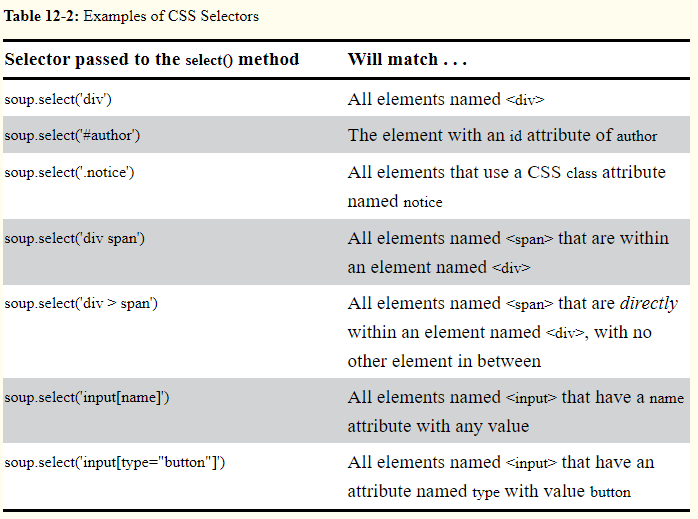

##getText() and .attrs

In [ ]:
import bs4

exampleFile = open('example.html')
exampleSoup = bs4.BeautifulSoup(exampleFile.read(), 'html.parser')

elems = exampleSoup.select('#author') # elems is a list of Tag objects.

type(elems)  # <class 'list'>

type(elems[0]) # <class 'bs4.element.Tag'>
str(elems[0]) #'<span id="author">Al Sweigart</span>'
elems[0].getText() #'Al Sweigart'
elems[0].attrs #{'id': 'author'}

##get() method for Tag objects

The get() method for Tag objects makes it simple to access attribute values from an element. The method is passed a string of an attribute name and returns that attribute’s value.

In [ ]:
 import bs4

soup = bs4.BeautifulSoup(open('example.html'), 'html.parser')

spanElem = soup.select('span')[0]

str(spanElem) #'<span id="author">Al Sweigart</span>'
spanElem.get('id') #'author'
spanElem.get('some_nonexistent_addr') == None #True
spanElem.attrs #{'id': 'author'}

#Here we use select() to find any <span> elements and then store the first
#matched element in spanElem. Passing the attribute name 'id' to get() returns 
#the attribute’s value, 'author'.

#Selenium

opens and command a webdriver, can interact with it 

##Open Webdriver

In [ ]:
#open selenium webdriver 
browser = webdriver.Chrome()
#go to URL
browser.get('hhttps://automatetheboringstuff.com/2e/chapter12/')

##Methods for Finding Elements

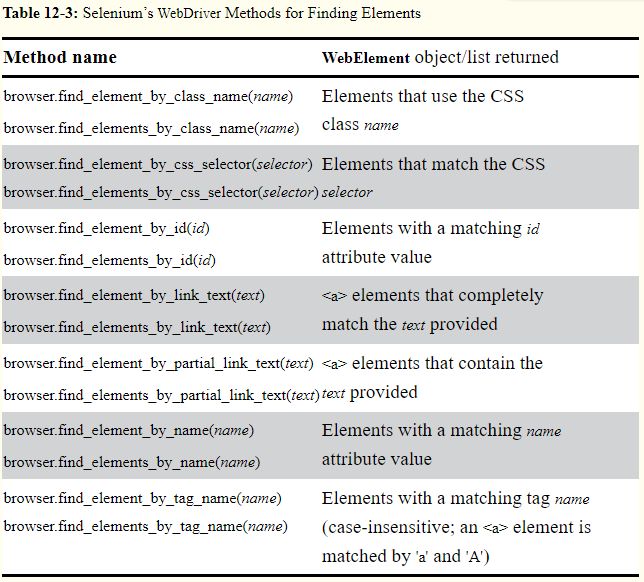

In [ ]:
#selecting the whole page, useful to use special keys such as Keys.LEFT
htmlElem = browser.find_element_by_tag_name('html')

In [ ]:
for n in browser.find_elements_by_class_name('tile-inner'):
    print(n.text)

##WebElement Attributes and Methods

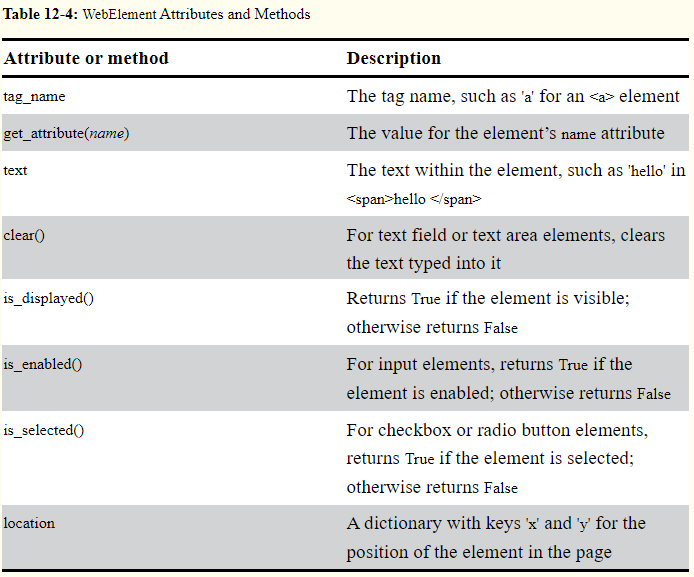

In [ ]:
htmlElem1.text

## click(), send_keys(), is_displayed()

In [ ]:
#click() method clicks on element
elem.click()

#send_keys() writes whataver you want in a form/input element
userElem = browser.find_element_by_id('user_name')
userElem.send_keys('your_real_username_here')

# is_displayed returns True of False if the element is visible to the user
elem.is_displayed()

##Special Keys

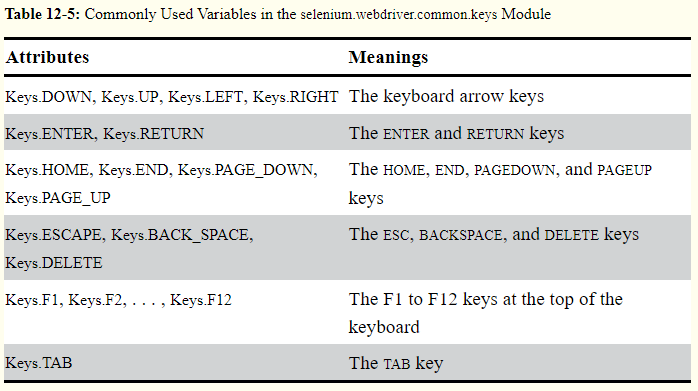

In [ ]:
#example of special key, press LEFT
htmlElem.send_keys(Keys.LEFT) 

##WebDriverWait

If we had to worry about an asynchronous HTTP call (or many) to an API, there are two ways to solve this:

- Use a time.sleep(ARBITRARY_TIME) before taking the screenshot.
- Use a WebDriverWait object.

A few expected conditions:

- `element_to_be_clickable`
- `text_to_be_present_in_element`
- `element_to_be_clickable`
- `presence_of_element_located`

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Firefox()
driver.get("http://somedomain")

element = WebDriverWait(driver, 10).until(
    EC.element_to_be_clickable((By.ID, "myDynamicElement"))
)

##Run Chrome in headless mode 

without any graphical user interface

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.headless = True
options.add_argument("--window-size=1920,1200")

driver = webdriver.Chrome(options=options, executable_path=DRIVER_PATH)
driver.get("https://www.nintendo.com/")
print(driver.page_source)
driver.quit()

#Full Projects

Exemples of projects I developed or came across while learning 

##Project 1 - searchpypi

a robot that searches input at https://pypi.org/ and open the first n pages

In [ ]:
#! python 3
# searchpypi - a robot that searches input at https://pypi.org/ and open the first n pages

import bs4, requests, webbrowser,time


n_links = input('How many links do you want to open?')
topic = input("what do you want me to search at pypi.org?")
#setting the address replacing spaces for '+' to match pypi.org search engine
address = ('https://pypi.org/search/?q=' + topic.replace(" ", "+"))

#getting the response object
res = requests.get(address)
#testing if it worked
res.raise_for_status()

#parsing the html
searchSoup = bs4.BeautifulSoup(res.text, 'html.parser')
#selecting the links in HTML
links_to_open = searchSoup.select(".package-snippet")

#creating an empty list to receive the second half of the adresses
address_list = ["" for n in range(0,int(n_links))]
#defining a var to the first part of the site articles' adresses
site_adress = "https://pypi.org/"


for n in list(range(int(n_links))):
    try:
        address_list[n] = site_adress + links_to_open[n].get('href')
        webbrowser.open(address_list[n])
    except:
        print (f'só encontrei {len(links_to_open)}')

#setting 20 secs to read the print of error before the cmd closes
time.sleep(20)

##Project 2 - download_cover_of_books

a robot created from scratch to download all the book covers from the homepage of 'https://inventwithpython.com/'

In [ ]:
#! python 3
# WS_personal_project - a robot created from scratch to download all the book covers
# from the homepage of 'https://inventwithpython.com/'

import requests
import bs4
import os

os.mkdir(r'C:\Python_Scripts\Covers')
url = 'https://inventwithpython.com/'

#get the home page and check if it worked
res = requests.get(url)
res.raise_for_status()

#parsig the HTML
soup = bs4.BeautifulSoup(res.text, 'html.parser')
#getting the img elements inside a "<a> <\a>"
img_element = soup.select('a img')
#create a list to store each img url str in a element of the list
imgsrc = ['' for n in range(len(img_element))]
#getting the second half of the url of the covers
for n in range(len(img_element)):
    imgsrc[n] = img_element[n].get('src')

    # downloading the covers, specifying only covers by url
    if 'cover' in imgsrc[n]:
        #getting the source page for the image
        img_res = requests.get(url + imgsrc[n])
        img_res.raise_for_status()

        # saving the image
        imageFile = open(os.path.join(r'\Python_Scripts\Covers',
                                      os.path.basename(imgsrc[n])), 'wb')
        for chunk in img_res.iter_content(100000):
            imageFile.write(chunk)
        imageFile.close()
        print(f'{imgsrc[n]} downloaded')
    else:
        print( f"{imgsrc[n]} is not a cover, im not downloading it")

##Project 3 - download_comic

a robot to download every comic in the site "https://xkcd.com/"

In [ ]:
#! python 3
# download_comic.py - a robot to download every comic in the site

import requests, os, bs4

url = "https://xkcd.com/"

os.makedirs(r'\Python_Scripts\xkcd', exist_ok=True)    # store comics in ./xkcd

while not url.endswith('#'):
    print(f'Downloading page{url}')
    #getting the response object
    res = requests.get(url)
    #testing if it worked
    res.raise_for_status()

    #parsing the html
    soup = bs4.BeautifulSoup(res.text, 'html.parser')
    #selecting the img URL
    comicElem = soup.select('#comic img')

    if comicElem == []:
        print('Could not find comic image.')
    else:
        comicUrl = 'https:' + comicElem[0].get('src')
        # Download the image.
        print(f'Downloading image {comicUrl}')
        res = requests.get(comicUrl)
        res.raise_for_status()

         # Save the image to ./xkcd.
        imageFile = open(os.path.join(r'\Python_Scripts\xkcd', os.path.basename(comicUrl)), 'wb')
        for chunk in res.iter_content(100000):
            imageFile.write(chunk)
        imageFile.close()

    # Get the Prev button's url.
    prevLink = soup.select('a[rel="prev"]')[0]
    url = 'https://xkcd.com' + prevLink.get('href')


##Project 4 - 2048 robot